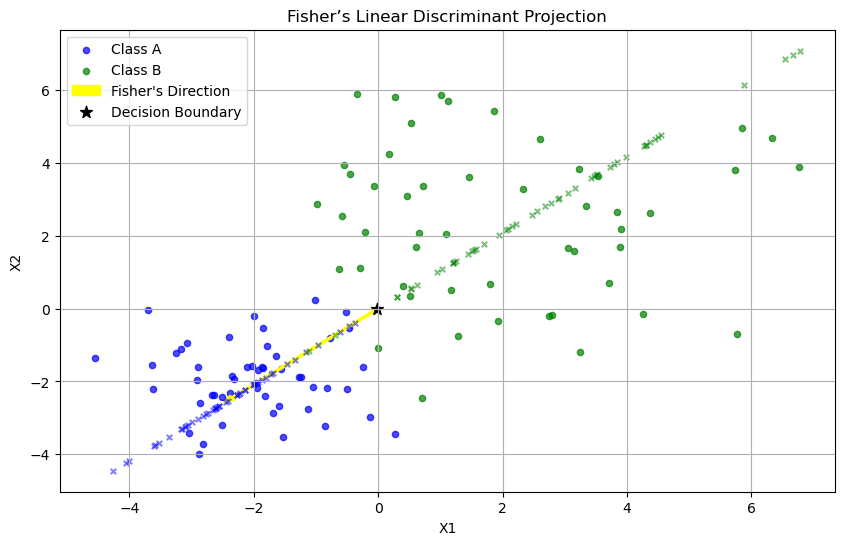

[0. 0.] → Class A
[ 0.  -0.5] → Class B
[0.5 0. ] → Class A


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(0)

# Generate datapoints for Class A and Class B
A = np.random.normal(loc=[-2, -2], scale=1, size=(50, 2))
B = np.random.normal(loc=[2, 2], scale=2, size=(50, 2))

# Compute class means
Ma = np.mean(A, axis=0)  
Mb = np.mean(B, axis=0)  

# Compute covariance matrices of Class A and Class B
Sa = np.cov(A.T, bias=True)   
Sb = np.cov(B.T, bias=True)  

# Compute within-class scatter matrix
SW = Sa + Sb

# Compute Fisher’s LDA direction (v)
v = np.linalg.inv(SW) @ (Ma - Mb)  

# Project all points onto v
Pa = A @ v  
Pb = B @ v  
# Compute decision boundary as the mean difference between closest projected points
# Compute pairwise distances between projected points
distance = cdist(Pa[:, None], Pb[:, None])  
# Find the indices of the closest pair
idx_A, idx_B = np.unravel_index(np.argmin(distance), distance.shape)

# Extract closest projected points
closest_Pa, closest_Pb = Pa[idx_A], Pb[idx_B]
decision_boundary = (closest_Pa - closest_Pb) / 2

# Visualization
plt.figure(figsize=(10, 6))

# Scatter original points
plt.scatter(A[:, 0], A[:, 1], color='blue', alpha=0.7, s=20, label='Class A')
plt.scatter(B[:, 0], B[:, 1], color='green', alpha=0.7, s=20, label='Class B')  

# Projection line (arrow for v)
origin = np.array([0, 0])
plt.arrow(origin[0], origin[1], v[0] * 3, v[1] * 3, color='yellow', width=0.05, label="Fisher's Direction") 

# Projected points 
plt.scatter(Pa * v[0], Pa * v[1], color='blue', marker='x', alpha=0.5, s=15)
plt.scatter(Pb * v[0], Pb * v[1], color='green', marker='x', alpha=0.5, s=15)  

# Decision boundary visualization
plt.scatter(decision_boundary * v[0], decision_boundary * v[1], color='black', marker='*', s=80, label='Decision Boundary')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Fisher’s Linear Discriminant Projection")
plt.legend()
plt.grid()
plt.show()

# Classify new points
new_points = np.array([[0, 0], [0, -0.5], [0.5, 0]])  # Points to classify
new_projections = new_points @ v  # Project them onto v
classification = np.where(new_projections < decision_boundary, "Class A", "Class B")

# Print classification results
for point, label in zip(new_points, classification):
    print(f"{point} → {label}")

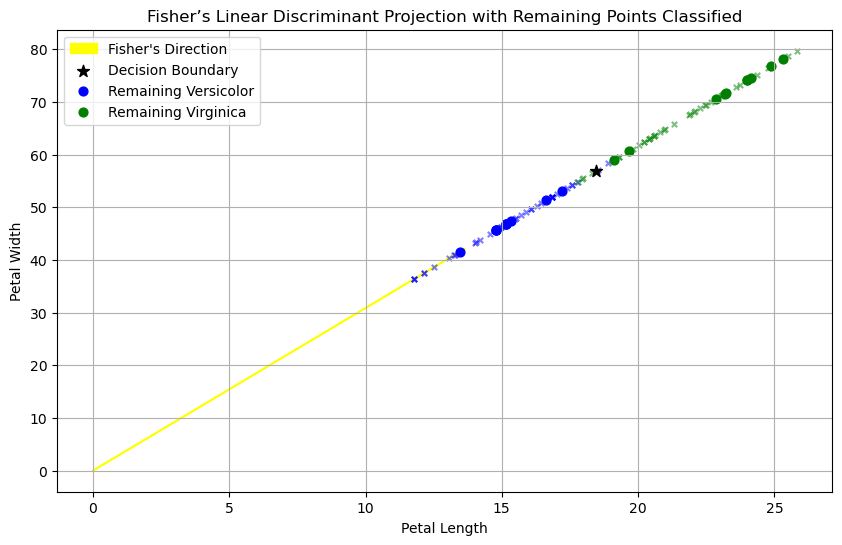


Classification Threshold: 13.589643716019872


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris dataset
data = load_iris()
X = data.data[:, 2:4]  # Petal length and width
y = data.target

# Select Versicolor (class 1) and Virginica (class 2)
versicolor_all = X[y == 1]  # All points of Class A (Versicolor)
virginica_all = X[y == 2]  # All points of Class B (Virginica)

# Randomly sample 40 points from each class
np.random.seed(0)  # Ensuring reproducibility
versicolor_indices = np.random.choice(50, 40, replace=False)
virginica_indices = np.random.choice(50, 40, replace=False)

# Extract the 40 selected points
versicolor = versicolor_all[versicolor_indices]
virginica = virginica_all[virginica_indices]

# Compute class means
Ma = np.mean(versicolor, axis=0)
Mb = np.mean(virginica, axis=0)

# Compute covariance matrices of Class A and Class B
Sa = np.cov(versicolor.T, bias=True)
Sb = np.cov(virginica.T, bias=True)

# Compute within-class scatter matrix
SW = Sa + Sb

# Compute Fisher’s LDA direction (v)
v = np.linalg.inv(SW) @ (Ma - Mb)

# Ensure Fisher's line extends in the first quadrant (positive direction)
v = np.abs(v)

# Scale Fisher's line to make it longer
scale_factor = 10  # You can adjust this value to make the line longer
v_scaled = v * scale_factor

# Project only the selected 80 points onto v
Pa = versicolor @ v  # Projected Versicolor (40 points)
Pb = virginica @ v  # Projected Virginica (40 points)

# Extract the 10 remaining points for each class
remaining_versicolor = versicolor_all[np.setdiff1d(np.arange(50), versicolor_indices)]
remaining_virginica = virginica_all[np.setdiff1d(np.arange(50), virginica_indices)]

# Classify remaining points based on projection
remaining_versicolor_projection = remaining_versicolor @ v
remaining_virginica_projection = remaining_virginica @ v

# Compute the classification threshold (average projection of the 40 points)
threshold = (np.mean(Pa) + np.mean(Pb)) / 2

# Classify the remaining points
classified_remaining_versicolor = ["Versicolor" if p < threshold else "Virginica" for p in remaining_versicolor_projection]
classified_remaining_virginica = ["Versicolor" if p < threshold else "Virginica" for p in remaining_virginica_projection]

# Visualization
plt.figure(figsize=(10, 6))

# Projection line (arrow for v) starting from the origin (0,0) and extending in the 1st quadrant
plt.arrow(0, 0, v_scaled[0], v_scaled[1], color='yellow', width=0.05, label="Fisher's Direction")  # Scaled direction

# Projected points 
plt.scatter(Pa * v[0], Pa * v[1], color='blue', marker='x', alpha=0.5, s=15)
plt.scatter(Pb * v[0], Pb * v[1], color='green', marker='x', alpha=0.5, s=15)

# Decision boundary visualization
decision_boundary = (np.mean(Pa) + np.mean(Pb)) / 2  # Decision boundary location
plt.scatter(decision_boundary * v[0], decision_boundary * v[1], color='black', marker='*', s=80, label='Decision Boundary')

# Project remaining points with smaller size
plt.scatter(remaining_versicolor_projection * v[0], remaining_versicolor_projection * v[1], color='blue', marker='o', label='Remaining Versicolor', s=40)
plt.scatter(remaining_virginica_projection * v[0], remaining_virginica_projection * v[1], color='green', marker='o', label='Remaining Virginica', s=40)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Fisher’s Linear Discriminant Projection with Remaining Points Classified")
plt.legend()
plt.grid()
plt.show()

# Print the threshold
print("\nClassification Threshold:", threshold)
